In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace = True)

In [5]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [7]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


d:\dm_klastering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\dm_klastering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\dm_klastering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\dm_klastering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\dm_klastering\.venv\Lib\site-packages\sklearn\cluster\_kmeans

Text(2, 150000, 'Possible elbow point')

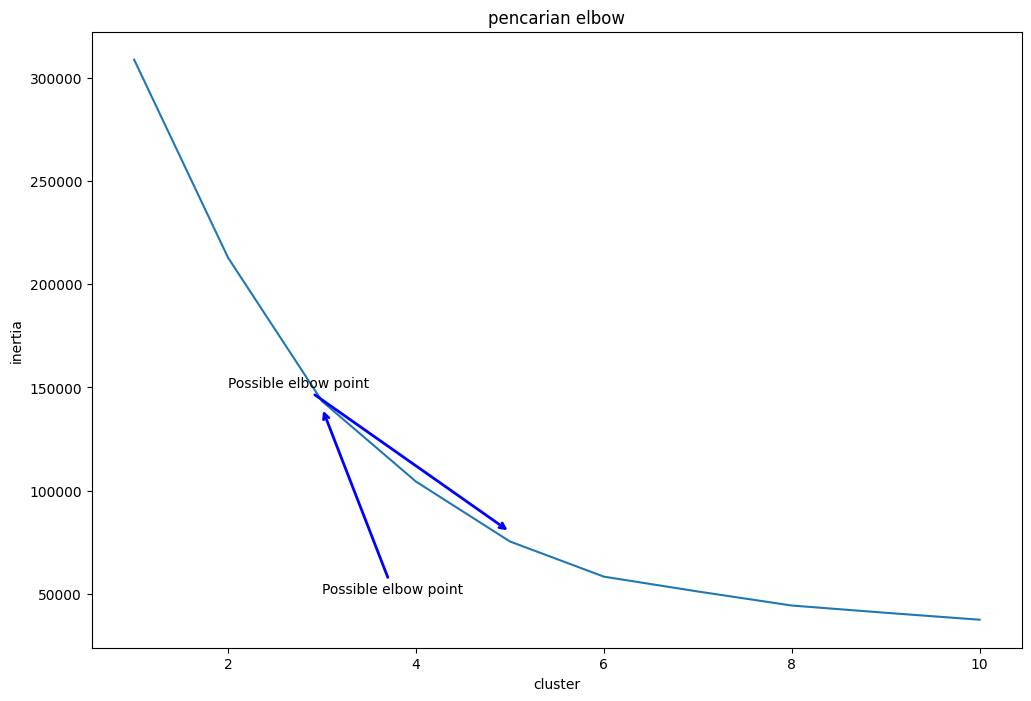

In [8]:
, ConnectionStyle
from matplotlib.patches import ArrowStyle
clusters=[]
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)),y=clusters, ax=ax)
ax.set_title('pencarian elbow')
ax.set_xlabel('cluster')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('Possible elbow point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow point', xy=(5, 80000), xytext=(2, 150000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

In [9]:
#klaster dibagi menjadi 4 klaster
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

d:\dm_klastering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


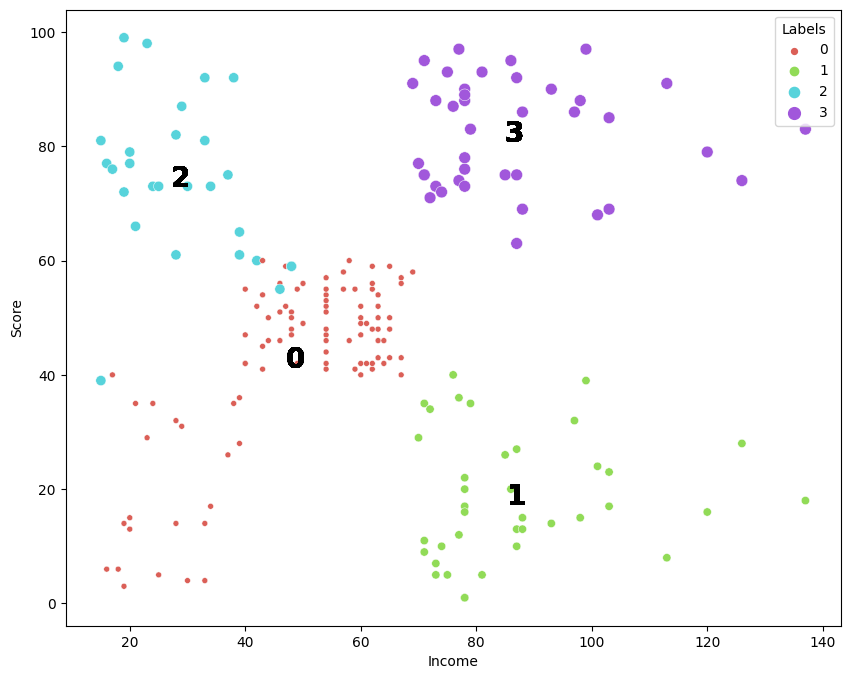

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], markers=True, size=X['Labels'], palette=sns.color_palette('hls', n_clust))

#keterangan
for label in X['Labels']:
  plt.annotate(label,
               (X[X['Labels']==label]['Income'].mean(),
                X[X['Labels']==label]['Score'].mean()),
                horizontalalignment ='center',
                verticalalignment='center',
                size=20, weight='bold',
                color='black')

In [11]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       2
1     21      15     81       2
2     20      16      6       0
3     23      16     77       2
4     31      17     40       0
..   ...     ...    ...     ...
195   35     120     79       3
196   45     126     28       1
197   32     126     74       3
198   32     137     18       1
199   30     137     83       3

[200 rows x 4 columns]
